In [28]:
%matplotlib inline
import numpy as np
import scipy as sp
import seaborn as sns
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
sns.set_style('white')

mu = 50
sigma = 10
S = 1
n = 1000

In [29]:
s = np.random.normal(mu, sigma, n)

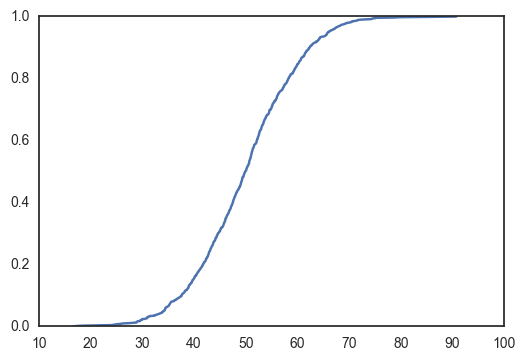

In [30]:
sorted_s = np.sort(s)
yvals = np.arange(len(sorted_s))/float(len(sorted_s))
plt.plot(sorted_s, yvals)

In [31]:
spl = UnivariateSpline(sorted_s, yvals)

In [32]:
X_s = np.linspace(np.min(sorted_s), np.max(sorted_s), n)
Y_s = spl(X_s)

In [33]:
X_sn = (X_s-np.min(X_s))/(np.max(X_s)-np.min(X_s))

Y_sn = (Y_s-np.min(Y_s))/(np.max(Y_s)-np.min(Y_s))


In [34]:
X_d = X_sn
Y_d = Y_sn-X_sn

In [59]:
X_lm = X_d
#Y_lm = [(np.diff(np.sign(np.diff(Y_d[i:i+3]))) > 0).nonzero()[0] + 1 for i in range(0,n-1)]
Y_lm = [np.max(Y_d[i:i+3]) for i in range(0,n-3)]
Y_lm.append(Y_d[-2])
Y_lm.append(Y_d[-1])


In [60]:
T_lm = Y_lm - S* np.diff(X_sn)/(n-1)

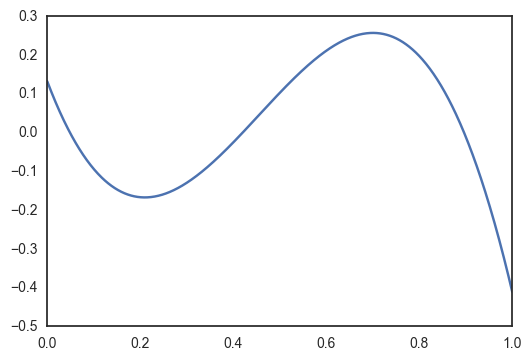

In [61]:
plt.plot(X_d,Y_d)


In [64]:
X[524]

51.675490032760415

In [71]:
np.where(T_lm == np.min(T_lm))

(array([998]),)

In [68]:
Y_lm = (np.diff(np.sign(np.diff(Y_d))) > 0).nonzero()[0] + 1

In [70]:
X_lm[Y_lm]

array([ 0.21021021])